Importing **pandas, NumPy, Matplotlib, and Seaborn**, then reading manufacturing_data.csv into a pandas DataFrame and prints the first five rows to preview the dataset.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("/content/manufacturing_data.csv")
df.head()

,Record Date,Fiscal Quarter,Production Dept,Day Of Week,Team,Planned Efficiency,Standard Minute Value,Work In Progress,Over Time Minutes,Performance Bonus,Idle Minutes,Idle Workers,Style Change Count,Worker Count,Efficiency Score
0,2/24/2015,Q4,Stitching Unit,Tuesday,Line-S1,0.6,22.53,708.0,5040,0,0.0,0,Minor Style Revision,42.0,0.268214
1,1/19/2015,Q3,Stitching Unit,Monday,Line-F3,0.8,11.41,1028.0,4380,50,0.0,0,No Style Change,31.0,0.800359
2,1/6/2015,Q1,Finishing & Quality,Tuesday,Line-C2,0.8,2.90,NaN,1440,0,0.0,0,No Style Change,8.0,0.681061
3,2/24/2015,Q4,Finishing & Quality,Tuesday,Line-S2,0.7,3.90,NaN,960,0,0.0,0,No Style Change,8.0,0.325000
4,1/4/2015,Q1,Finishing & Quality,Sunday,Line-C1,0.8,2.90,NaN,960,0,0.0,0,No Style Change,8.0,0.667604


1.**Counting** the number of **missing values** per column and **visualising** the missing‑data pattern with a **HeatMap** Graph.

Record Date                0
Fiscal Quarter             0
Production Dept            0
Day Of Week                0
Team                       0
Planned Efficiency         0
Standard Minute Value      0
Work In Progress         506
Over Time Minutes          0
Performance Bonus          0
Idle Minutes               0
Idle Workers               0
Style Change Count         0
Worker Count               0
Efficiency Score           0
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

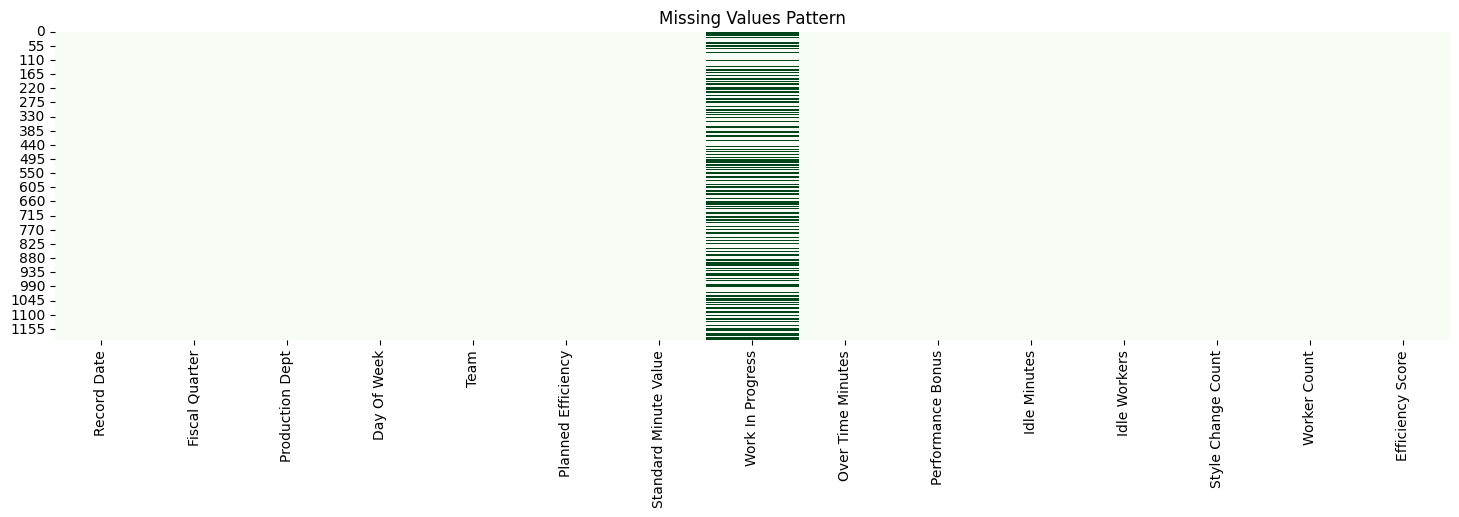

In [66]:
missing_val = df.isnull().sum()
print(missing_val)

plt.figure(figsize=(18,4))
sns.heatmap(df.isnull(), cbar = False, cmap = 'Greens')
plt.title('Missing Values Pattern')
plt.show

2.

In [67]:
df['Record Date'] = pd.to_datetime(df['Record Date'], errors='coerce')

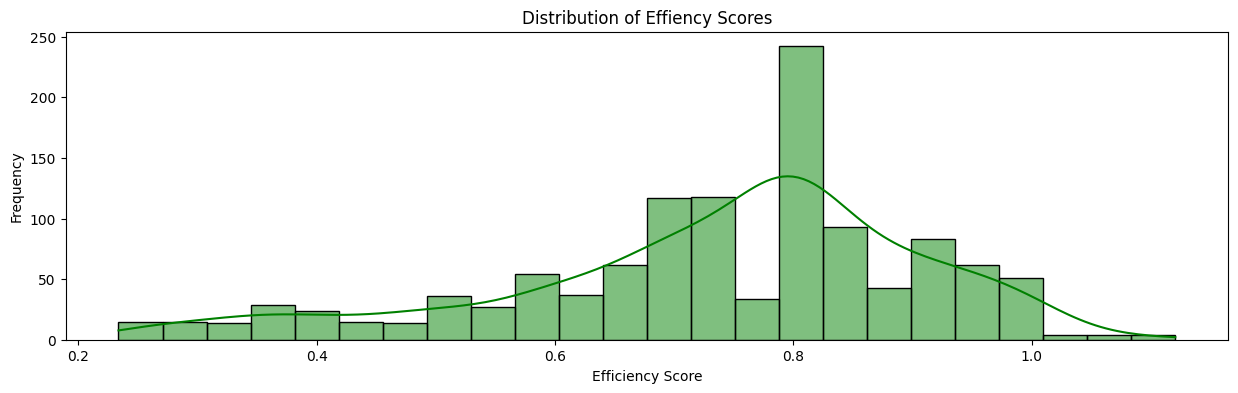

In [68]:
plt.figure(figsize=(15,4))
sns.histplot(df['Efficiency Score'], kde = True, color ='green')
plt.title('Distribution of Effiency Scores')
plt.xlabel('Efficiency Score')
plt.ylabel('Frequency')
plt.show()

3.**Fixing** the **Unnecessary Spaces** before and after the given value in order to get the **Correct and Meaningful Output**.

In [69]:
df['Production Dept'] = df['Production Dept'].str.strip()

In [70]:
df['Fiscal Quarter'].value_counts()

,count
Fiscal Quarter,
Q1,360
Q2,335
Q4,248
Q3,210
Q5,44


In [71]:
df['Production Dept'].value_counts()

,count
Production Dept,
Stitching Unit,691
Finishing & Quality,506


In [72]:
df['Day Of Week'].value_counts()

,count
Day Of Week,
Wednesday,208
Sunday,203
Tuesday,201
Monday,199
Thursday,199
Saturday,187


In [73]:
df['Team'].value_counts()

,count
Team,
Line-S2,109
Line-C2,109
Line-S1,105
Line-F1,105
Line-Q1,104
Line-Q2,100
Line-P2,99
Line-C1,96
Line-S3,95


In [74]:
df['Style Change Count'].value_counts()

,count
Style Change Count,
No Style Change,1050
Minor Style Revision,114
Major Design Shift,33


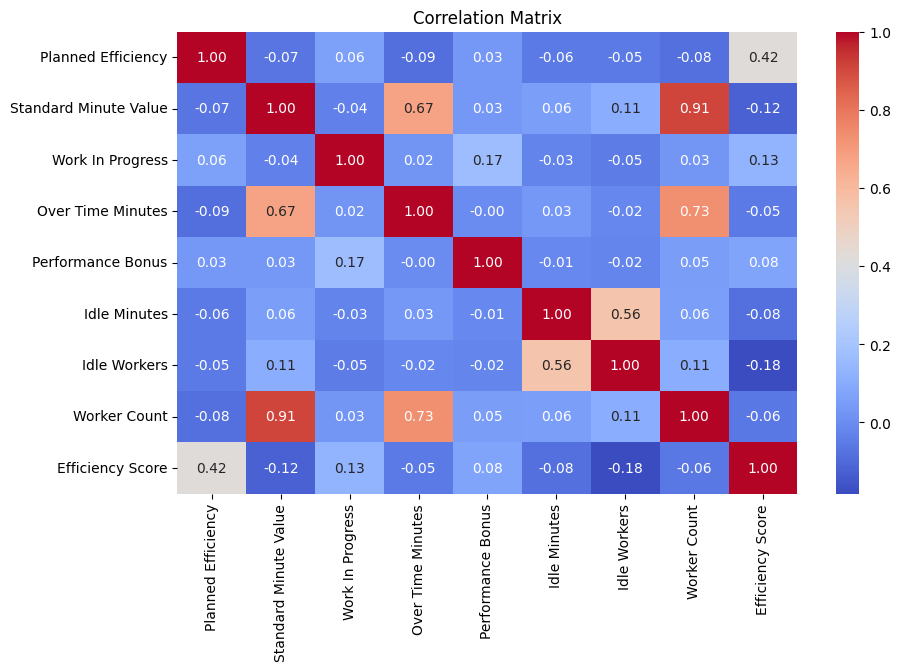

In [75]:
plt.figure(figsize=(10,6))
num_cols = df.select_dtypes(include=np.number).columns
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

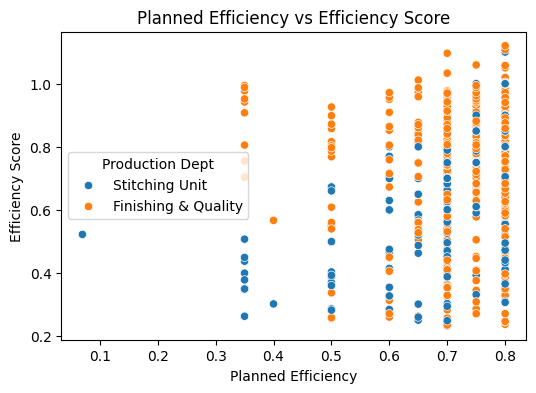

In [76]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Planned Efficiency', y='Efficiency Score', hue='Production Dept')
plt.title('Planned Efficiency vs Efficiency Score')
plt.show()

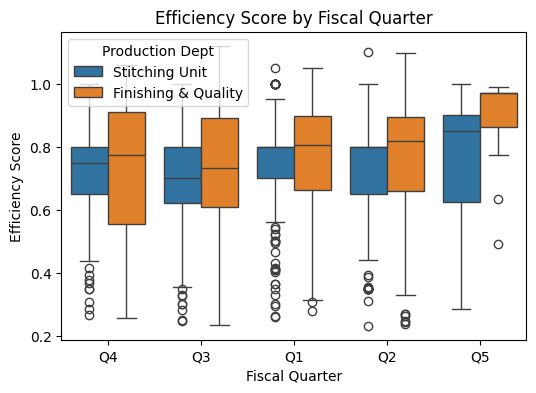

In [77]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Fiscal Quarter', y='Efficiency Score', hue='Production Dept')
plt.title('Efficiency Score by Fiscal Quarter')
plt.show()

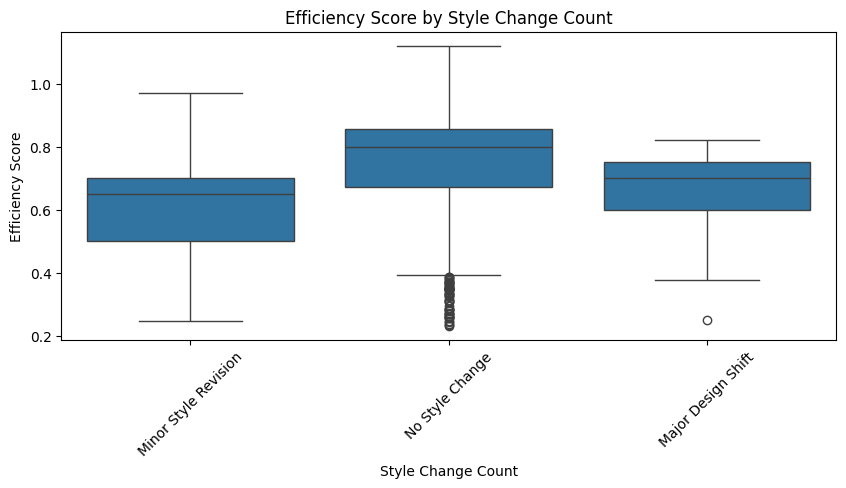

In [78]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='Style Change Count', y='Efficiency Score')
plt.title('Efficiency Score by Style Change Count')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-860982933.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Day Of Week', y='Efficiency Score', estimator='mean', ci=None)


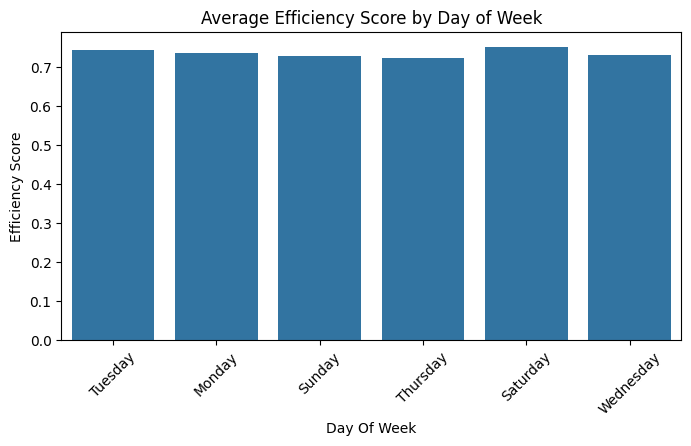

In [79]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='Day Of Week', y='Efficiency Score', estimator='mean', ci=None)
plt.title('Average Efficiency Score by Day of Week')
plt.xticks(rotation=45)
plt.show()

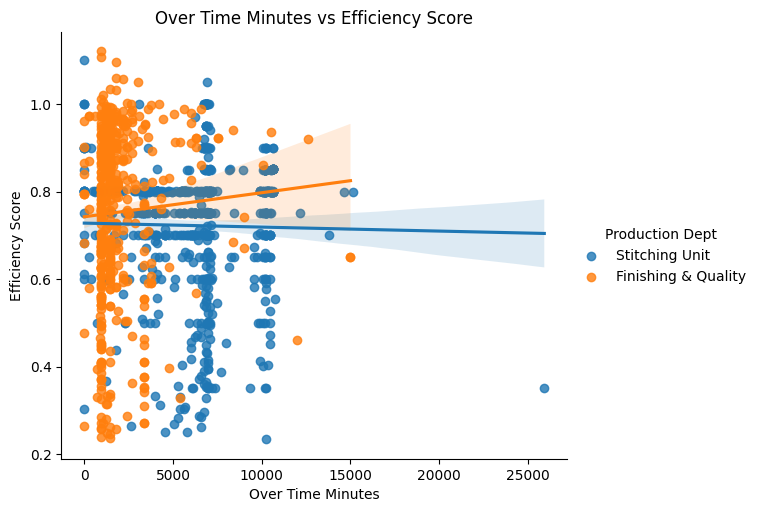

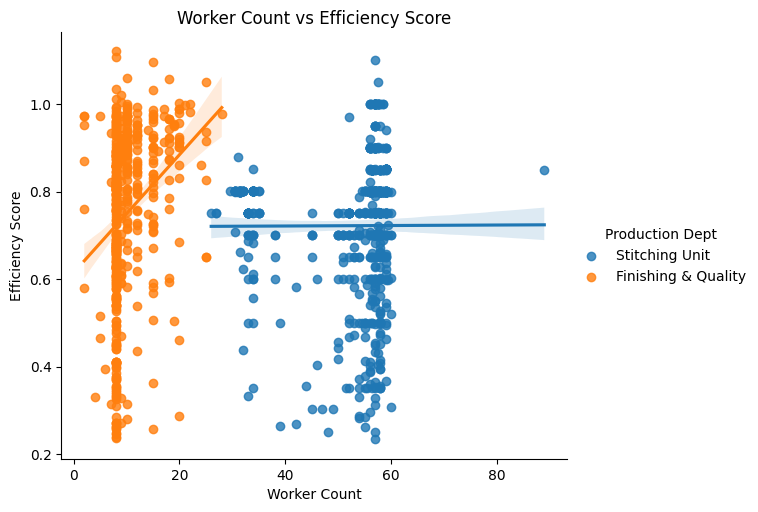

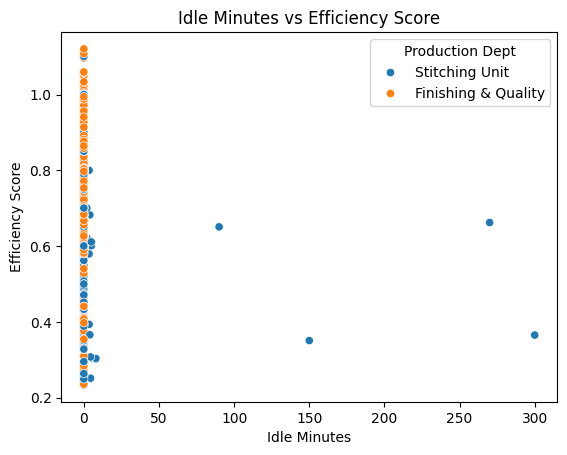

In [80]:
sns.lmplot(data=df, x='Over Time Minutes', y='Efficiency Score', hue='Production Dept', aspect=1.2)
plt.title('Over Time Minutes vs Efficiency Score')
plt.show()

sns.lmplot(data=df, x='Worker Count', y='Efficiency Score', hue='Production Dept', aspect=1.2)
plt.title('Worker Count vs Efficiency Score')
plt.show()

sns.scatterplot(data=df, x='Idle Minutes', y='Efficiency Score', hue='Production Dept')
plt.title('Idle Minutes vs Efficiency Score')
plt.show()

/tmp/ipython-input-3916515115.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_eff, x='Efficiency Score', y='Production Dept', palette='Blues_r')


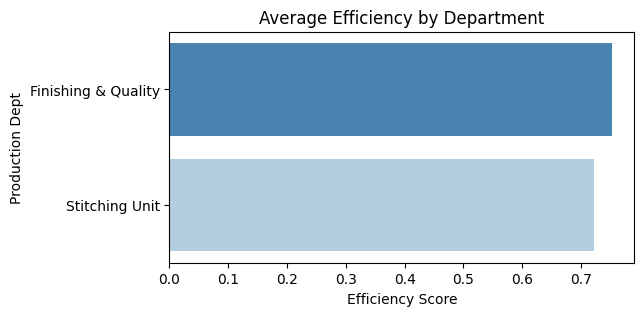

/tmp/ipython-input-3916515115.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_eff, x='Team', y='Efficiency Score', palette='cool')


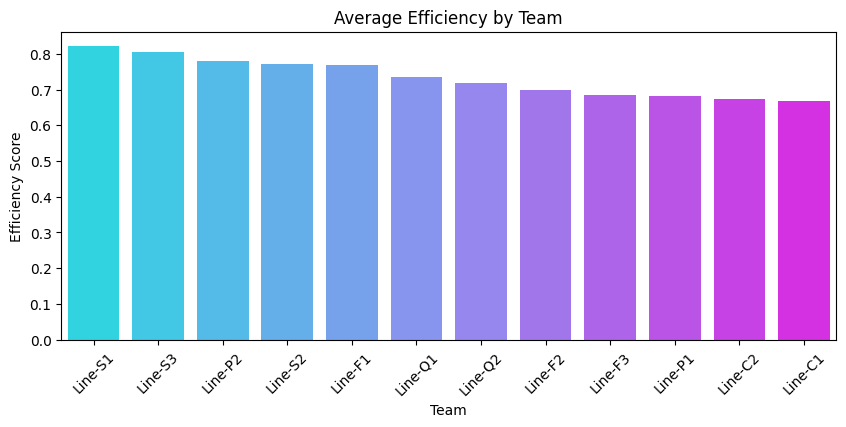

In [81]:
# Average efficiency by department
dept_eff = df.groupby('Production Dept')['Efficiency Score'].mean().reset_index().sort_values(by='Efficiency Score', ascending=False)
plt.figure(figsize=(6,3))
sns.barplot(data=dept_eff, x='Efficiency Score', y='Production Dept', palette='Blues_r')
plt.title('Average Efficiency by Department')
plt.show()

# Average efficiency by team
team_eff = df.groupby('Team')['Efficiency Score'].mean().reset_index().sort_values(by='Efficiency Score', ascending=False)
plt.figure(figsize=(10,4))
sns.barplot(data=team_eff, x='Team', y='Efficiency Score', palette='cool')
plt.title('Average Efficiency by Team')
plt.xticks(rotation=45)
plt.show()
